In [1]:
'''
Experiment 1:
The below code gives the top two countries which hold the highest number of noble prizes.
For this I'm using the coloumn Country to extarct the information. 
'''

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data_frame = pd.read_csv('/content/sample_data/nobel_prize_by_winner.csv', encoding='latin-1')

data_frame = data_frame.dropna()  #dropiing all the non a number, undefined, unrepresentable, missing values

# Combine all the text columns into a single string
text = ' '.join(data_frame['country'].tolist()) 

# Tokenize the text
tokens = word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.lower() not in stop_words]

# Calculate word frequencies
freq_dist = nltk.FreqDist(tokens)

# Print the top 2 most common words
for word, frequency in freq_dist.most_common(2):
    print(word)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


USA
Canada


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


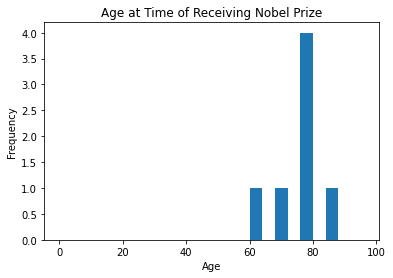

In [2]:
'''
Experiment 1:
The below code plots a histogram of their age when receiving the prize.
From the below plot we can cleary say that most of teh arwards where recieved between the age 60 to 80
'''

import numpy as np
import matplotlib.pyplot as plt


# Convert birthdate and prize year columns to datetime format
data_frame['birth_date'] = pd.to_datetime(data_frame['born'])
data_frame['prize_year'] = pd.to_datetime(data_frame['year'], format='%Y')

# Calculate age at the time of receiving the prize
data_frame['age'] = data_frame['prize_year'].dt.year - data_frame['birth_date'].dt.year

# Create a histogram of ages
plt.hist(data_frame['age'], bins=np.arange(0, 100, 4))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at Time of Receiving Nobel Prize')
plt.show()


In [3]:
'''
Experiment 1:
The below code gives the most common words words used in the title. For this, We have a coloumn "name" in the kaggle dataset. 
I used that column to extarct the common words used in the title. 
'''

filter_words = ['the', 'of', 'and', 'in', 'to', 'for', 'on', 'with', 'at', 'an', '(', ')']

# Combine all the text columns into a single string
text = ' '.join(data_frame['name'].tolist())

# Tokenize the text
tokens = word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.lower() not in stop_words and token.lower() not in filter_words]

# Calculate word frequencies
freq_dist = nltk.FreqDist(tokens)

# Print the top 20 most common words
for word, frequency in freq_dist.most_common(20):
    print(word, frequency)


University 5
British 1
Columbia 1
Texas 1
Instruments 1
California 1
McMaster 1
Massachusetts 1
Institute 1
Technology 1
MIT 1
Stanford 1
Virginia 1
Commonwealth 1


In [4]:
'''
Experiment 2:
The below code is the basic code where we are extarcting the top 20 words from the Wikipedia page and comparing
the results with the experiment 1.
As seen in the output, we got pyshics is one of the words common in both the experiments.
'''

import requests
from bs4 import BeautifulSoup
from collections import Counter
import re

# Send a GET request to the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country'
response = requests.get(url)

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

text = soup.get_text()   # Extract the text from the page

text = re.sub('[^a-zA-Z]+', ' ', text)   # Remove special characters and numbers

text = text.lower()   # Convert the text to lowercase

words = text.split() # Tokenize the text into individual words

# Define the stop words to remove
stop_words = ['the', 'of', 'or' ,'and', 'in', 'to', 'for', 'with',
          'a', 'as', 'on', 'by', 'at', 'an', 'was', 'is', 'from', 'that', 'were', 'which']

filtered_words = [word for word in words if word not in stop_words]   # Remove stop words

# Calculate word frequencies and print the top 20 most common words
word_freqs = Counter(filtered_words)
for word, freq in word_freqs.most_common(20):
    print(word, freq)


medicine 294
physics 290
physiology 289
born 272
chemistry 263
peace 146
literature 144
economics 119
edit 92
nobel 68
now 68
laureates 47
john 43
list 40
germany 38
c 37
j 37
hungary 34
austria 33
empire 33


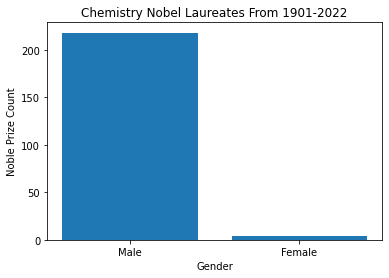

In [5]:
'''
Experiment 3:
The below code give the count of compares the male and female Noble Laurates from the year 1901 to 2022.
Then a bar graph is plotted to cleary show the comparision
'''
# read the data from the website
url = "https://stats.areppim.com/listes/list_nobelxprize.htm"
noble_prize_data = pd.read_html(url, header=0)

# extract the data for the Chemistry category
chemistry_field = noble_prize_data[4][["Gender", "Name"]]

# count the number of male and female laureates
chemistry_field_count = chemistry_field.groupby("Gender").size()
male_count = chemistry_field_count["Male"]
female_count = chemistry_field_count["Female"]

# plot a bar graph
fig, b = plt.subplots()
b.bar(["Male", "Female"], [male_count, female_count])
b.set_xlabel("Gender")
b.set_ylabel("Noble Prize Count")
b.set_title("Chemistry Nobel Laureates From 1901-2022")
plt.show()

